In [1]:
from helper_functions import estimate_adopters, bass_model, estimate_bass_parameters, calculate_market_potential, predict_diffusion, estimate_adopters_by_period

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dexcom Stelo (2024 Summer) 
(ref: https://investors.dexcom.com/news/news-details/2024/Stelo-by-Dexcom-First-Glucose-Biosensor-to-be-Cleared-by-FDA-as-Over-the-Counter/default.aspx)


Over-The-Counter Glucose Monitor :

https://time.com/7094684/dexcom-stelo/

A similar past innovation to Dexcom Stelo is the Dexcom G series (G5, G6, and G7) continuous glucose monitors (CGMs). Dexcom has been a leader in CGM technology, gradually improving its devices with each generation. The G-series CGMs were primarily targeted at people with diabetes who required continuous blood glucose monitoring for insulin management. These devices provided real-time glucose readings, integration with insulin pumps, and alerts for high or low blood sugar levels, significantly improving diabetes care.

Dexcom Stelo, however, marks a major shift in accessibility and target audience. Unlike the G-series, which required a prescription, Stelo is an over-the-counter CGM aimed at individuals with Type 2 diabetes who are not on insulin. This innovation removes barriers to adoption, allowing more people to monitor their glucose levels without medical restrictions. The technology behind Stelo builds upon the accuracy and ease of use of Dexcom’s previous models, but its market impact is broader, as it targets a much larger population of people managing their blood sugar levels through lifestyle and medication rather than insulin therapy. This evolution makes Dexcom Stelo an ideal innovation to analyze through the Bass Model, using the adoption curve of the G-series as a reference.

### Data

In [3]:
csv_file1 = 'data/statistic_id1009408_diabetes_care_devices_market_revenue_worldwide.xlsx'
csv_file2 = 'data/statistic_id524932_top_health_care_services_companies_by_sales_growth.xlsx'
csv_file3 = 'data/statistic_id1513929_dexcom-revenue-2019-2023.xlsx'

df1 = pd.read_excel(csv_file1, sheet_name='Data')
df2 = pd.read_excel(csv_file2, sheet_name='Data')
df3 = pd.read_excel(csv_file3, sheet_name='Data')

In [4]:
diabetes_care_devices_market_revenue_worldwide = df1.iloc[4:, 1:].reset_index(drop=True)
diabetes_care_devices_market_revenue_worldwide.columns = ['Year', 'Revenue']
diabetes_care_devices_market_revenue_worldwide["Year"] = diabetes_care_devices_market_revenue_worldwide["Year"].astype(float)
diabetes_care_devices_market_revenue_worldwide["Revenue"] = diabetes_care_devices_market_revenue_worldwide["Revenue"].astype(float)

In [5]:
top_health_care_services_sales_growth = df2.iloc[4:, 1:].reset_index(drop=True)

In [6]:
dexcom_revenue_2019_2023 = df3.iloc[4:, 1:].reset_index(drop=True)
dexcom_revenue_2019_2023.columns = ['Year', 'Revenue']
dexcom_revenue_2019_2023["Year"] = dexcom_revenue_2019_2023["Year"].astype(float)
dexcom_revenue_2019_2023["Revenue"] = dexcom_revenue_2019_2023["Revenue"].astype(float)

In [7]:
diabetes_care_devices_market_revenue_worldwide

,Year,Revenue
0,2016.0,10.71
1,2017.0,11.70
2,2018.0,13.57
3,2019.0,16.00
4,2020.0,18.10
5,2021.0,21.28
6,2022.0,23.01
7,2023.0,26.09
8,2024.0,29.41
9,2025.0,33.09


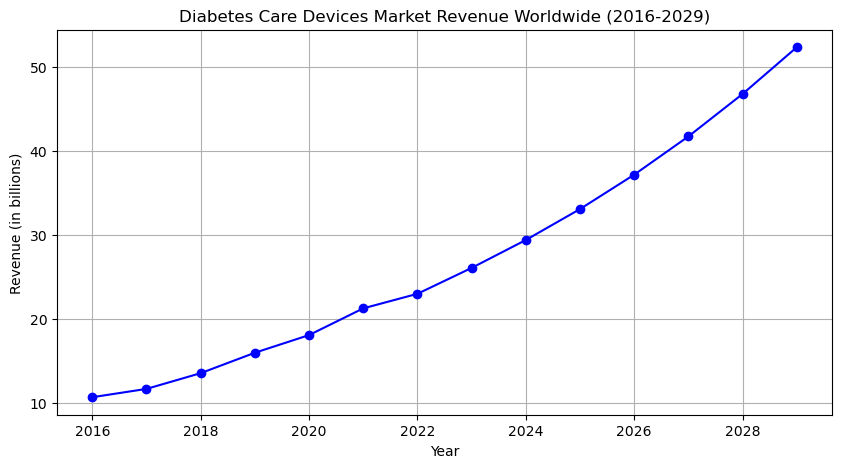

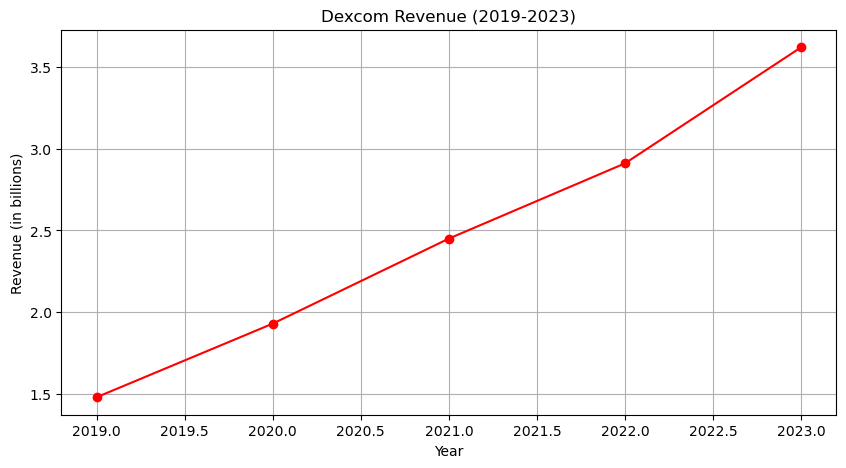

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(diabetes_care_devices_market_revenue_worldwide['Year'], diabetes_care_devices_market_revenue_worldwide['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Diabetes Care Devices Market Revenue Worldwide (2016-2029)')
plt.xlabel('Year')
plt.ylabel('Revenue (in billions)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(dexcom_revenue_2019_2023['Year'], dexcom_revenue_2019_2023['Revenue'], marker='o', linestyle='-', color='r')
plt.title('Dexcom Revenue (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Revenue (in billions)')
plt.grid(True)
plt.show()

In [9]:
top_health_care_services_sales_growth #just to show the popularity of the innovator

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Shanghai Microport Medbot,904.8,in %
1,Lantheus Holdings,119.9,in %
2,Schockwave Medical,106.5,in %
3,Quidelortho,92.3,in %
4,Inspire,74.7,in %
5,ICU Medical,73.2,in %
6,Masimo,64.3,in %
7,Dian Diagnostics,55.2,in %
8,Winner Medical,41.1,in %
9,Inari Medical,38.4,in %


In [10]:
dexcom_revenue_2019_2023

,Year,Revenue
0,2019.0,1.48
1,2020.0,1.93
2,2021.0,2.45
3,2022.0,2.91
4,2023.0,3.62


To estimate the average selling price of Dexcom G6 devices, we can consider the following components:

 **Sensors**
   - Each sensor lasts 10 days requiring approximately 3 sensors per month
   - Price per sensor: Approximately USD 173.45 
   - Monthly cost for sensors: 3 sensors x USD 173.45 = USD 520.35

**Transmitter**
   - Each transmitter lasts about 3 months
   - Price per transmitter: Approximately USD 400
   - Monthly cost for transmitter: USD 400 / 3 months = USD 133.33

**Receiver**
   - One-time purchase, often optional as many users utilize compatible smart devices
   - Price per receiver: Approximately USD 169.83
   - Amortized monthly cost: Assuming a 1-year usage, USD 169.83 / 12 months = USD 14.15

**Total Estimated Monthly ASP per User**
- Sensors: USD 520.35
- Transmitter: USD 133.33
- Receiver: USD 14.15
- Total USD 520.35 + USD 133.33 + USD 14.15 = USD 667.83 per month

**Annual ASP per User** = USD 667.83 x 12 months = USD 8,013.96

Referances

https://www.dexcom.com/savings-center-cgm-without-insurance
    
https://www.singlecare.com/prescription/dexcom-g6-receiver
    
https://pharmacy.amazon.com/Dexcom-G6-10-Day-Sensor-3-pack/dp/B09NLZNMRH?

In [11]:
df_dexcom_adopters = estimate_adopters(dexcom_revenue_2019_2023, 8014)

M_market_based = calculate_market_potential(diabetes_care_devices_market_revenue_worldwide, market_share=0.25, asp_per_user=8014, target_year=2029)

bass_params_refined = estimate_bass_parameters(df_dexcom_adopters, initial_guess=[0.01, 0.1, M_market_based])

print("Estimated Bass Model Parameters:")
print(bass_params_refined)


Estimated Bass Model Parameters:
{'p': 0.23465516906935469, 'q': 0.23465140547142632, 'M': 788299.7177180006}


In [12]:
df_stelo_predictions = predict_diffusion(bass_params_refined, start_year=2024, end_year=2035)

In [13]:
print("Predicted Diffusion of Dexcom Stelo (2024-2035):")
df_stelo_predictions

Predicted Diffusion of Dexcom Stelo (2024-2035):


,Year,Predicted Adopters
0,2024,181656.306966
1,2025,344992.153360
2,2026,478401.091893
3,2027,579073.920909
4,2028,650597.670614
5,2029,699263.128556
6,2030,731409.656581
7,2031,752231.145011
8,2032,765546.165406
9,2033,773991.485498


In [14]:
df_adopters_stelo = estimate_adopters_by_period(bass_params_refined, start_year=2024, end_year=2035)

In [15]:
df_adopters_stelo

,Year,New Adopters,Cumulative Adopters
0,2024,181656.306966,181656.306966
1,2025,163335.846394,344992.153360
2,2026,133408.938533,478401.091893
3,2027,100672.829016,579073.920909
4,2028,71523.749705,650597.670614
5,2029,48665.457942,699263.128556
6,2030,32146.528025,731409.656581
7,2031,20821.488430,752231.145011
8,2032,13315.020394,765546.165406
9,2033,8445.320093,773991.485498
